# **의사결정나무(Decision Tree): 개인실습용**

## **1. 라이브러리 로드**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 전처리 및 의사결정나무 모델 생성, 학습, 평가, 시각화 패키지
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 마이너스 기호(-) 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# # 한글 폰트 사용하기
# plt.rc('font', family='Malgun Gothic')

----------------------------------------------------------------------------------

## **2. 데이터 로드**

**winequality-red**
- 적포도주(레드 와인)의 품질에 대한 데이터

In [2]:
# csv 파일 로드(winequality-red.csv)
data = pd.read_csv('winequality-red.csv')
data.shape

(1599, 12)

In [3]:
# 데이터셋 확인
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# 데이터셋의 요약 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# 결측치 확인
data.isnull().sum() #결측치 없음 확인함

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# column 별 기본적인 통계 값 확인
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# 모델 훈련을 위해 실제 label(quality)은 y 변수로 따로 저장 후 제거
data['quality'].unique()
y = data['quality']
data2 = data.drop(['quality'], axis=1)
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


----------------------------------------------------------------------------------

## **3. 탐색적 데이터 분석(EDA)**

### **3-1. 변수 별 boxplot 확인**
- 모델 성능에 영향을 줄 수 있는 이상치에 대한 간단 시각화 분석 가능
- 데이터 분포를 쉽게 파악 가능

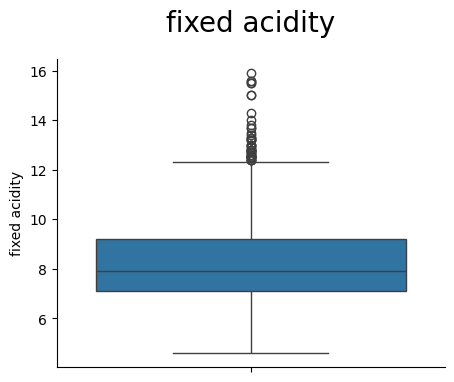

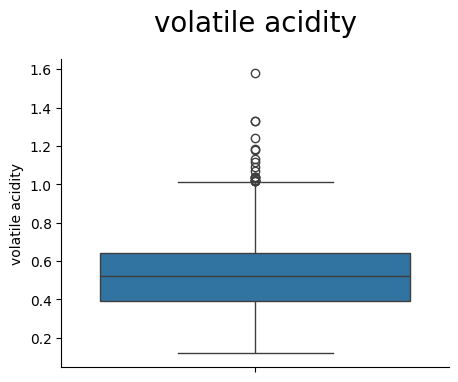

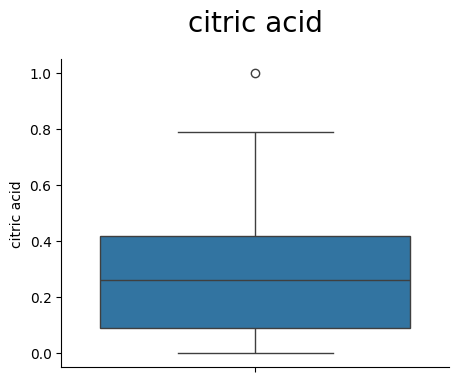

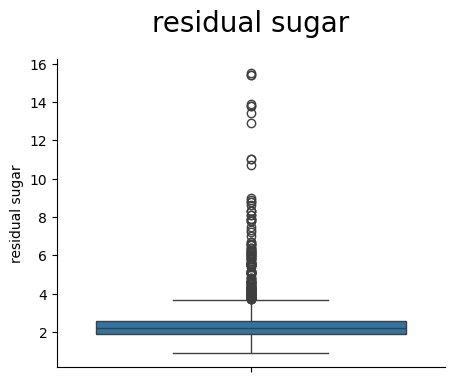

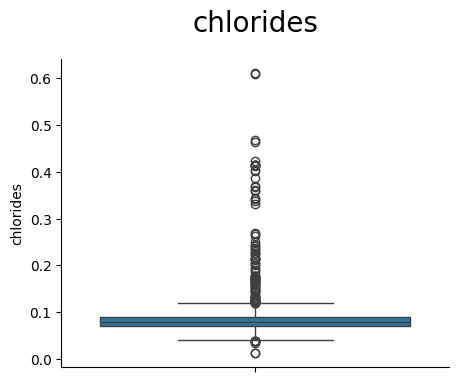

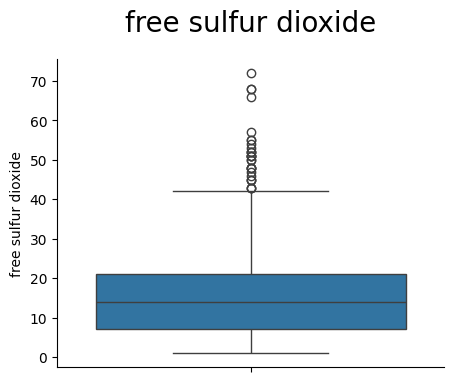

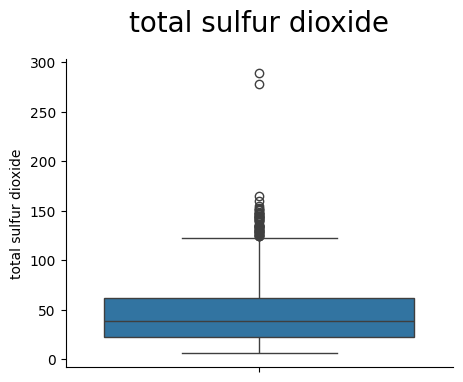

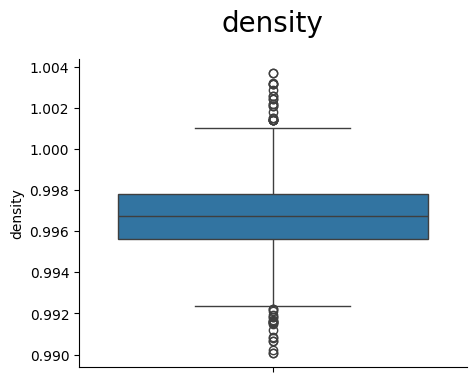

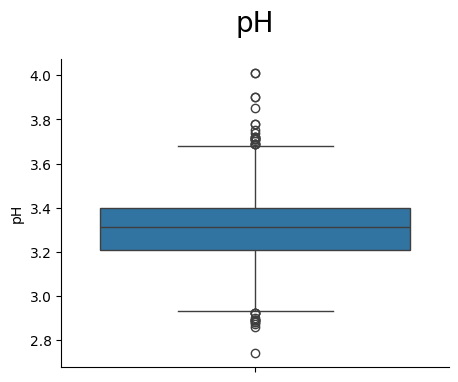

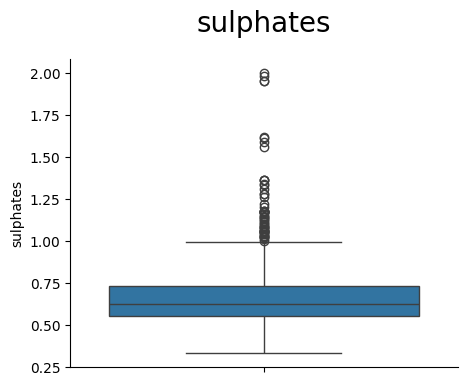

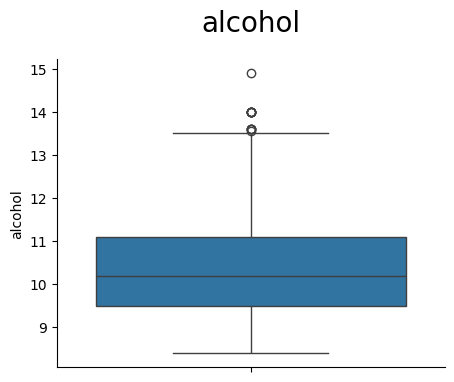

In [12]:
# 변수 별 boxplot 확인
for i in range (len(data2.columns)):
    plt.figure(figsize=[5,4])
    sns.boxplot(data=data2[data2.columns[i]])
    plt.title(data2.columns[i], size=20, pad=20)
    sns.despine()
    plt.show()

### **3-2. 독립변수들간의 상관성 분석**
- 상관계수는 -1에서 1 사이의 값을 가지며 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 나타냄
- 0에 가까운 값은 상관관계가 없을을 의미
- 독립 변수간에 높은 상관관계가 존재할 경우 다중공선성 문제가 발생할 수 있음
    
    ***-> 회귀 분석 등의 모델링에서 주의해야하는 부분***

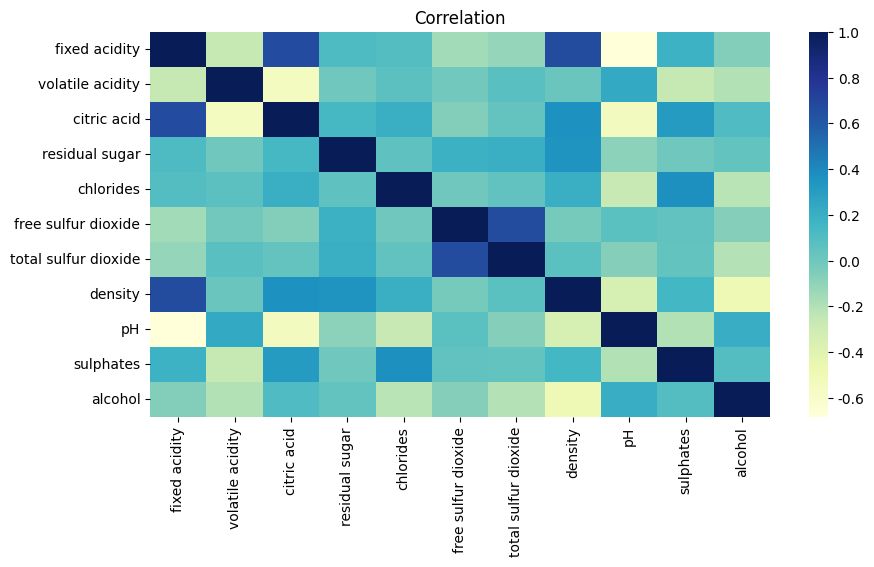

In [13]:
# 독립변수들간의 상관성 분석
df_corr = data2.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr, cmap="YlGnBu") # 히프맵으로 시각화
plt.title('Correlation')
plt.show()

### **3-3. 각 변수 별 히스토그램**
- 데이터 분포 확인에 용이
- 변수의 정규성 확인
- 변수의 변환 또는 클래스 불균형 확인에 용이

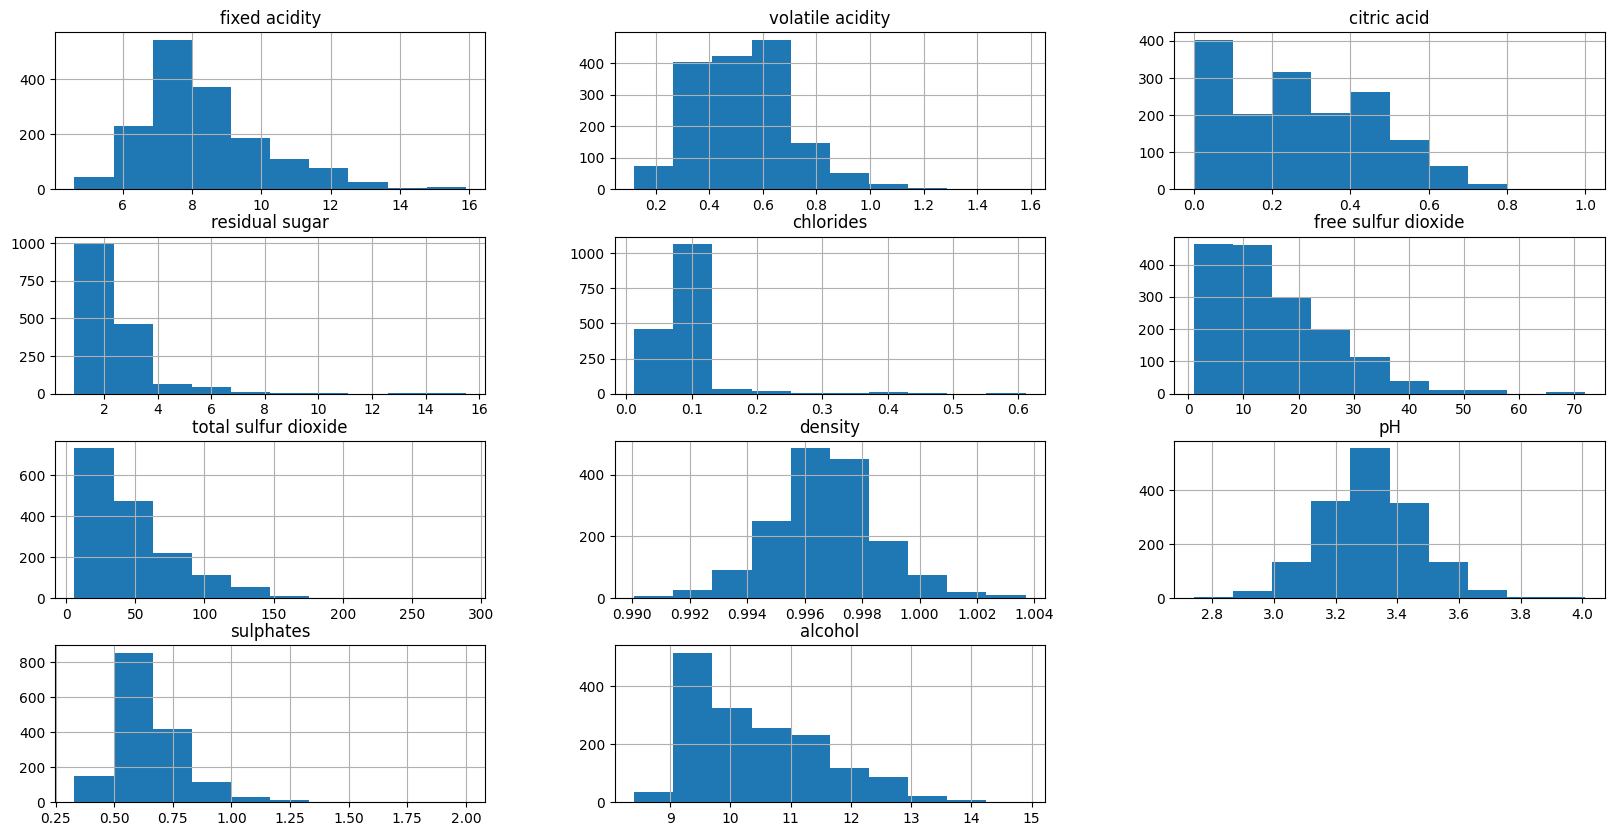

In [14]:
# 각 변수 별 히스토그램
h = data2.hist(figsize=(20,10))

### **3-4. 차원 축소(PCA) 진행**
- Y 데이터에 대한 데이터 분포 확인

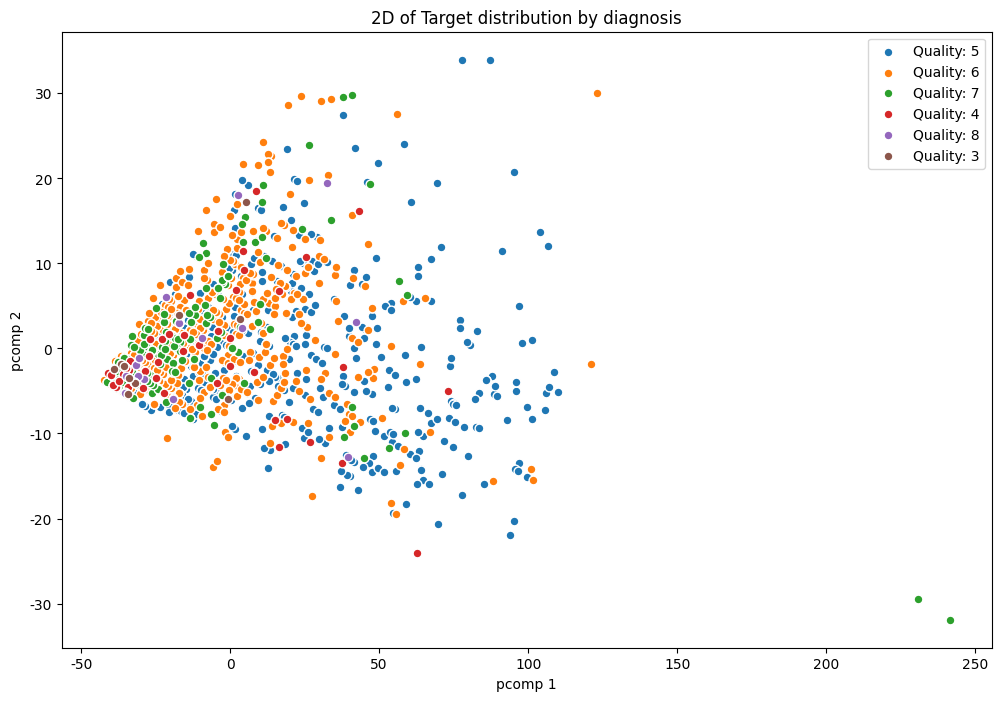

In [18]:
# 차원 축소(PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data2)

plt.figure(figsize=(12, 8))
# 클래스별로 산점도 그리기
for cls in y.unique():
    plt.scatter(data_pca[y == cls, 0], data_pca[y == cls, 1], 
                s=40, edgecolors='white', label=f'Quality: {cls}')
plt.title("2D of Target distribution by diagnosis")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.legend()
plt.show()

## **4. 데이터 전처리**

### **4-1. 데이터 정규화**
- EDA 과정에서 히스토그램 확인 결과(3-1-3.) 데이터 스케일 조정 필요
- **RobustScaler**: 중앙값(median)과 IQR(Interquartile Range, 사분위 범위)을 사용하여 데이터를 변환

In [21]:
data2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


정규화 적용 후 데이터셋 크기 :  (1599, 11)


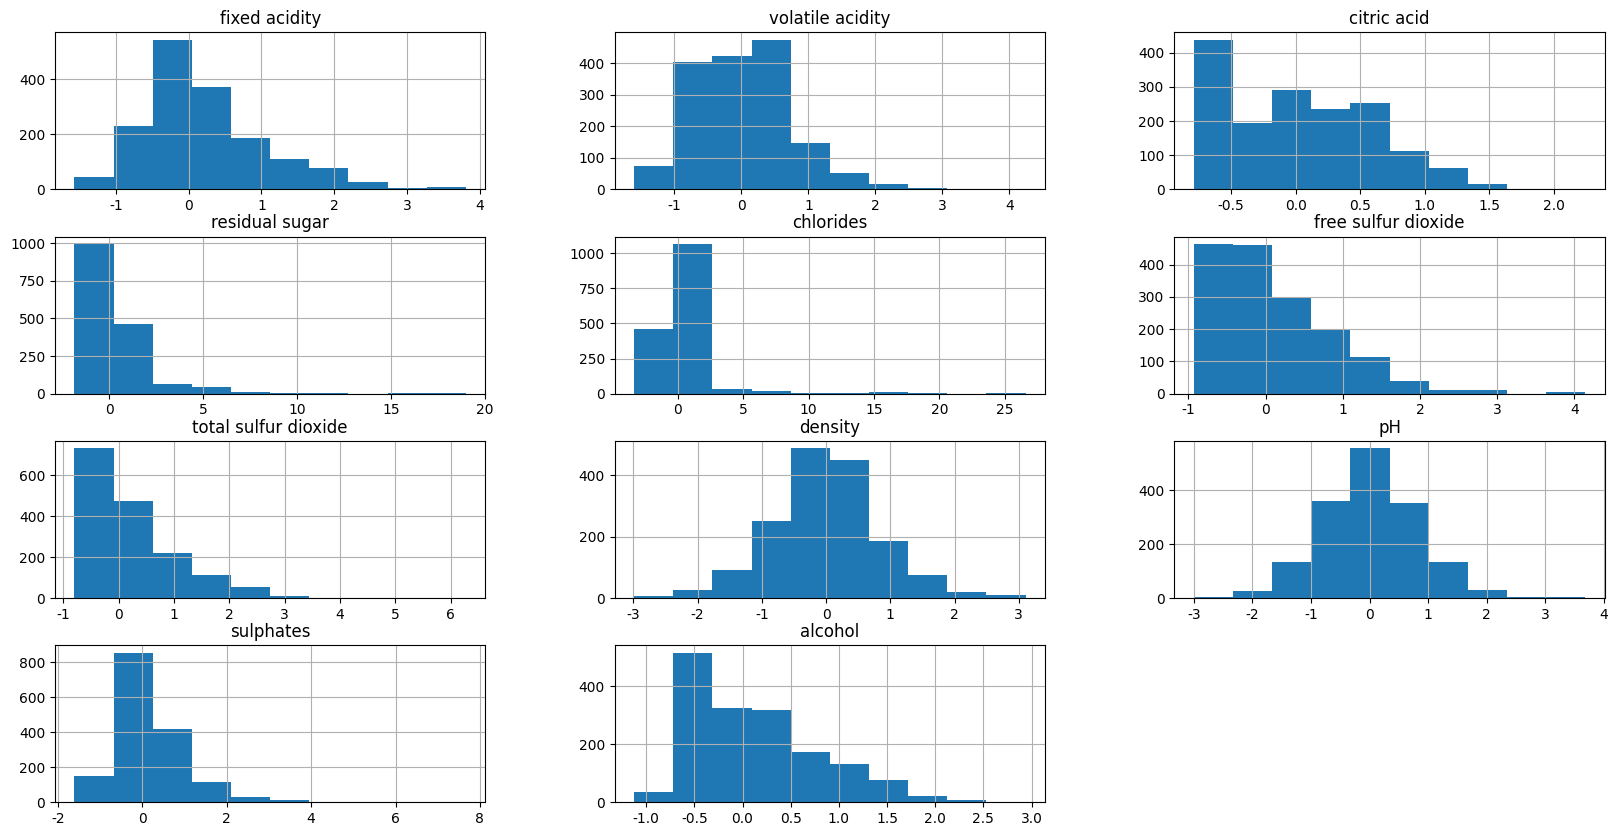

In [23]:
# 정규화 Scaler 적용
scaler = RobustScaler()
data_scaling = scaler.fit_transform(data2)
print("정규화 적용 후 데이터셋 크기 : ", data_scaling.shape)

# 각 변수 별 히스토그램
h_scaled_data = pd.DataFrame(data_scaling, columns=data2.columns)
h_scaled = h_scaled_data.hist(figsize=(20,10))

### **4-2. 학습, 검증 데이터 분할**
- train:test = 0.7:0.3 비율로 분할

In [24]:
# X와 y 데이터를 train dataset과 test dataset으로 split
X_train, X_test, y_train, y_test = train_test_split(data_scaling, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("Train dataset 크기 : ", X_train.shape)
print("Test dataset 크기 : ", X_test.shape)

Train dataset 크기 :  (1119, 11)
Test dataset 크기 :  (480, 11)


----------------------------------------------------------------------------------

## **5. Decision Tree 모델 구축**
- sklearn.tree의 DecisionTreeClassifier는 CART 알고리즘 기반의 모듈
- 하이퍼파라미터 설명
    - criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
        - 분할변수와 분할점을 결정하는 비용 함수 설정
    - splitter: {“best”, “random”}, default=”best”
        - 노드 분할 방법
    - max_depth: int, default=None
        - 트리의 최대 깊이
    - min_samples_split: int or float, default=2
        - 내부 노드를 분할하는 데 필요한 최소 샘플 수
    - min_samples_leaf: int or float, default=1
        - 리프 노드가 되기 위해 필요한 최소 샘플 수
    - max_features: int, float or {“sqrt”, “log2”}, default=None
        - 각 노드에서 분할에 사용할 최대 특성 수(None->모든 특성 사용)
    - random_state: int, RandomState instance or None, default=None
        - 모델의 재현성을 위한 난수 생성기의 시드(None->매번 다르게)


### **5-1. 모델 학습 및 예측**

In [25]:
# 의사결정나무 모델 생성
# 불순도 함수는 엔트로피 함수를 이용
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)

# 의사결정나무 모델 fit
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
# train dataset에 대한 pred
dt_predict_train = dt.predict(X_train)

# test dataset에 대한 pred
dt_predict_test = dt.predict(X_test)

### **5-2. 모델 평가**

**다중 클래스에서의 분류 성능평가 계산시**
- 'micro': 전체 TP, FP, FN을 합산하여 계산합니다. 클래스의 불균형이 있을 때 유용합니다.
- 'macro': 각 클래스의 지표를 계산한 후 평균을 냅니다. 클래스의 불균형에 영향을 받지 않습니다.
- 'weighted': 각 클래스의 지표를 계산한 후, 클래스의 샘플 수에 따라 가중 평균을 냅니다.

In [29]:
# 정확도 측정
# Train/Test dataset 정확도 확인
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

# Test Dataset에 대한 detail한 성능지표 확인
# Accuracy
accuracy = mt.accuracy_score(y_test, dt_predict_test)

# Precision
precision = mt.precision_score(y_test, dt_predict_test, average='macro')  # 또는 'micro', 'weighted'

# Recall
recall = mt.recall_score(y_test, dt_predict_test, average='macro')  # 또는 'micro', 'weighted'

# F1 Score
f1_score = mt.f1_score(y_test, dt_predict_test, average='macro')  # 또는 'micro', 'weighted'

print('\n----------Classification report for the Test dataset-----------\n')
print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')

Training set score: 1.0000
Test set score: 0.6021

----------Classification report for the Test dataset-----------

Accuracy:  0.60 

Recall:  0.33 

Precision:  0.32 

F1_score:  0.33 



**(1) confusion matrix**

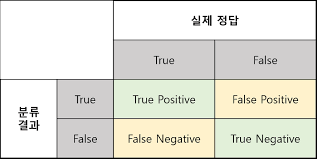

<Axes: >

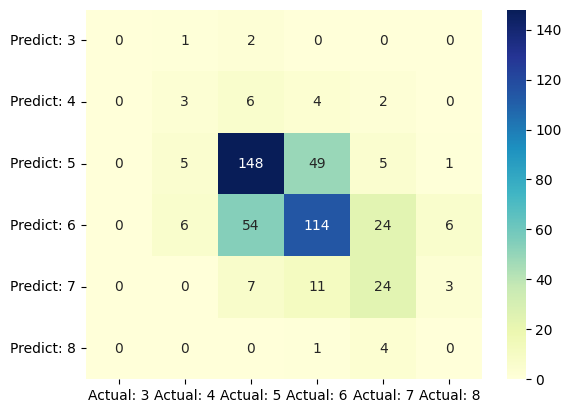

In [34]:
# Confusion Matrix 출력
# 혼동 행렬 계산
cm = confusion_matrix(y_test, dt_predict_test)

# 클래스 레이블을 가져옵니다 (예: [0, 1, 2]와 같은)
class_labels = sorted(set(y_test))

# 혼동 행렬을 데이터프레임으로 변환
cm_matrix = pd.DataFrame(data=cm, index=[f'Predict: {label}' for label in class_labels],
                         columns=[f'Actual: {label}' for label in class_labels])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**(2) Tree 시각화**
- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값(y label)에 해당하는 데이터 건수

[Text(0.49767641719168154, 0.9761904761904762, 'alcohol <= 0.203\nentropy = 1.735\nsamples = 1119\nvalue = [7.0, 38.0, 473.0, 434.0, 154.0, 13.0]\nclass = 7'),
 Text(0.2204866434823818, 0.9285714285714286, 'sulphates <= -0.472\nentropy = 1.403\nsamples = 690\nvalue = [4, 23, 399, 233, 30, 1]\nclass = 7'),
 Text(0.35908153033703166, 0.9523809523809523, 'True  '),
 Text(0.02408563782337199, 0.8809523809523809, 'residual sugar <= -1.357\nentropy = 1.014\nsamples = 161\nvalue = [1.0, 12.0, 127.0, 20.0, 1.0, 0.0]\nclass = 7'),
 Text(0.007136485280999108, 0.8333333333333334, 'density <= -0.937\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0]\nclass = 5'),
 Text(0.003568242640499554, 0.7857142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]\nclass = 3'),
 Text(0.010704727921498661, 0.7857142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]\nclass = 5'),
 Text(0.04103479036574487, 0.8333333333333334, 'volatile acidity <= 0.3\nentropy = 0.917\nsamples =

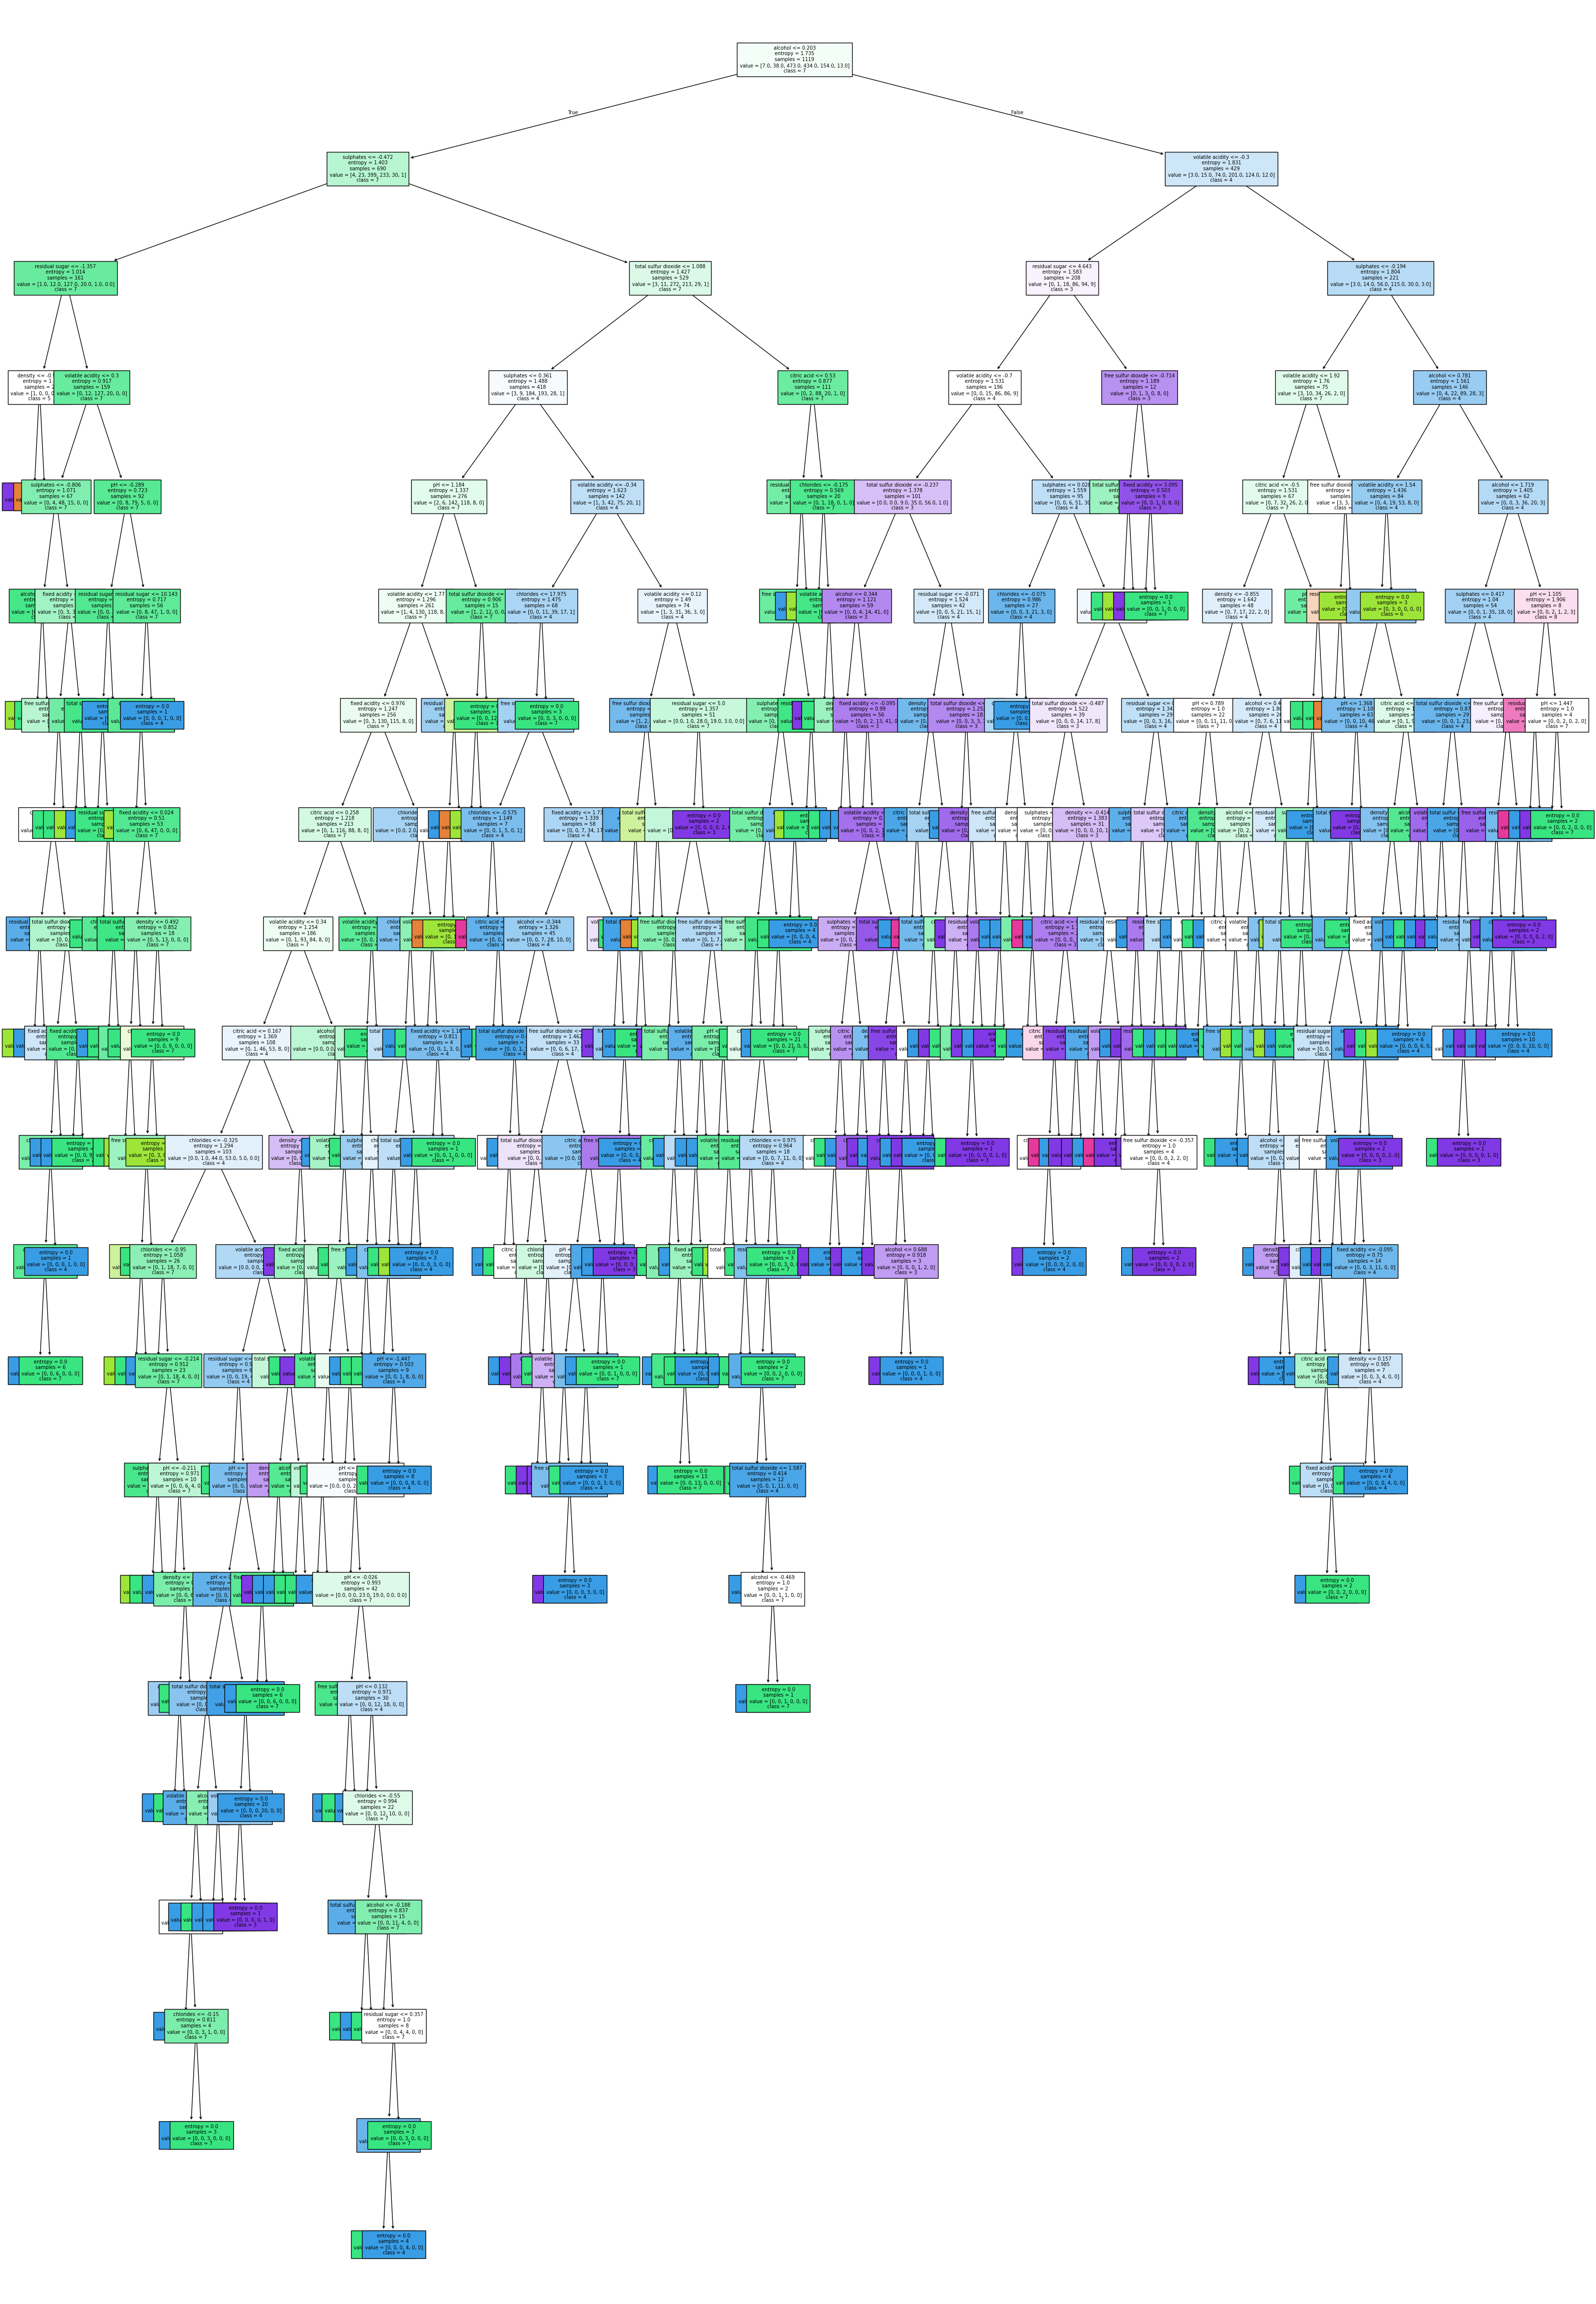

In [51]:
# Tree 시각화
plt.figure(figsize=(40,60))
tree.plot_tree(dt,feature_names=data2.columns, class_names=[str(label) for label in y_train.unique()], filled=True, fontsize=7)  

**(3) 모델 교차 검증**
- 5-Fold Cross Validation: 데이터셋을 5개의 부분(폴드)으로 나눈 후, 각 폴드에서 모델을 훈련하고 검증하는 과정을 반복하는 기법
- 검증 과정:
    1) 각 폴드를 한 번씩 검증 세트로 사용하고, 나머지 4개의 폴드로 모델을 훈련
    2) 예를 들어, 첫 번째 폴드를 검증 세트로 사용하면, 나머지 4개 폴드로 모델을 훈련
    3) 그런 다음, 훈련된 모델을 첫 번째 폴드에 대해 평가합니다.
    4) 이 과정을 5번 반복하여 각 폴드에 대해 모델의 성능을 평가

In [52]:
# 교차 검증(5-Fold Cross Validation)
scores = cross_val_score(dt, X_train, y_train, cv = 5)

print('Cross-validation scores:')
display(pd.DataFrame(scores, columns=['Accuracy']))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:


,Accuracy
0,0.562500
1,0.593750
2,0.616071
3,0.589286
4,0.551570


Average cross-validation score: 0.5826


***

## **6. 하이퍼파라미터 조정을 통해 모델 성능 향상 시키기**

In [ ]:
# 다양한 하이퍼파라미터 조정을 해가며 최적의 모델을 찾아보세요.